In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
import soundfile as sf
from IPython.display import Audio
from helpers.helper import *

In [40]:
track1_name = './samples/yt1.wav'
track2_name = './samples/yt2.wav'

t1, fs1 = librosa.load(track1_name)
t2, fs2 = librosa.load(track2_name)

print(f'Track 1 = {get_bpm(t1, fs1):.3f} bpm')
print(f'Track 2 = {get_bpm(t2, fs2):.3f} bpm')

Track 1 = 130.0117924528302 bpm
Track 2 = 125.0 bpm


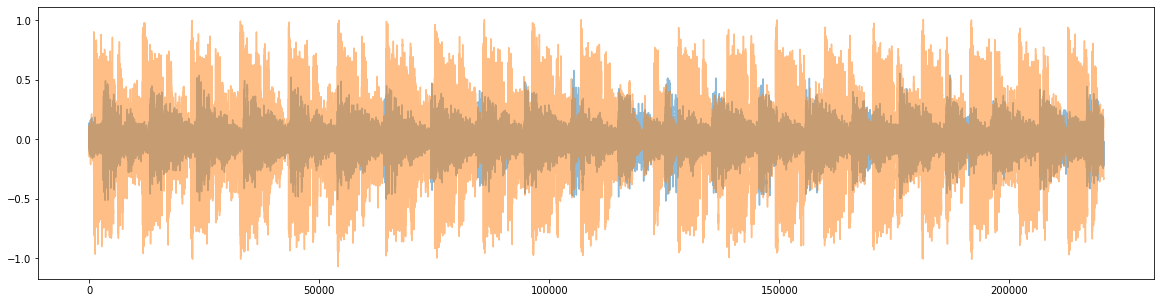

In [43]:
slot_size = 10

track1 = t1[len(t1)//2:(len(t1)//2)+slot_size*fs1]
track2 = t2[len(t2)//2:(len(t2)//2)+slot_size*fs2]

sf.write('track1.wav', track1, fs1)
sf.write('track2.wav', track2, fs2)

plt.figure(figsize=(20,5))
plt.plot(track1, alpha=0.5)
plt.plot(track2, alpha=0.5)
plt.show()

In [44]:
Audio('track1.wav')

In [45]:
Audio('track2.wav')

In [6]:
#track1 = np.sin(np.linspace(0,1000)*500*2*np.pi)
#track2 = np.sin(np.linspace(0,1000)*500*2*np.pi+125)

48


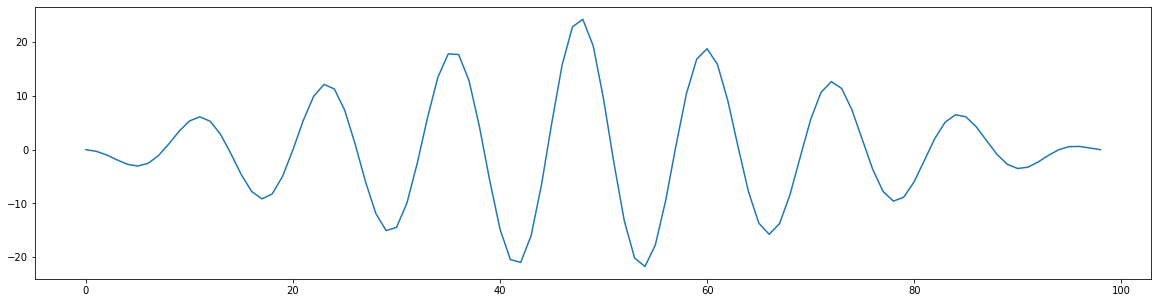

In [7]:
#corr = sps.correlate(track1, track2, mode='full')
#corr = corr[len(corr)//2:]
#plt.figure(figsize=(20,5))
#plt.plot(corr)
#sync_lag = np.argmax(corr)
#print(sync_lag)

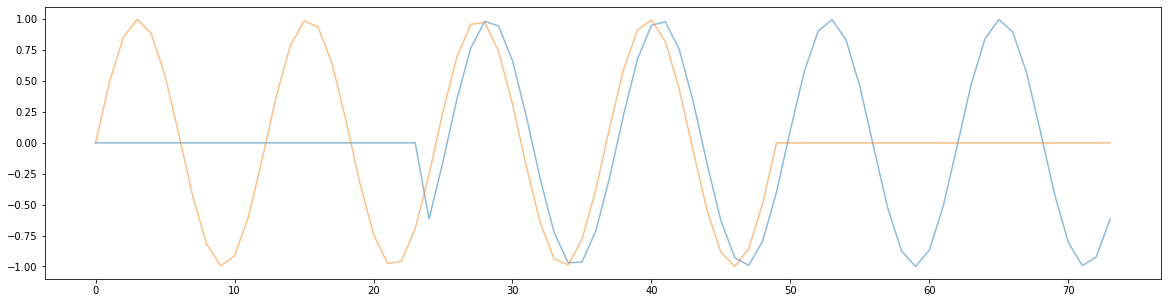

In [8]:
#plt.figure(figsize=(20,5))
#plt.plot(np.concatenate((np.zeros(sync_lag//2), track2)), alpha=0.5)
#plt.plot(np.concatenate((track1, np.zeros(sync_lag//2))), alpha=0.5)
#plt.show()

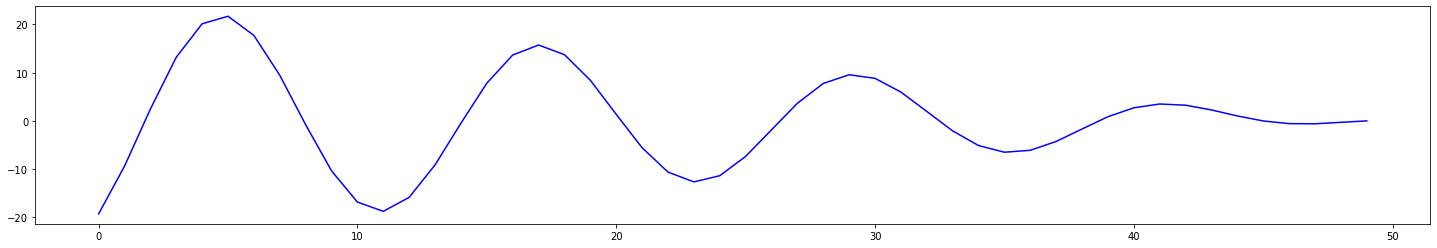

In [9]:
#N = len(track1)
#x_corr = np.correlate(track1, -track2, 'full')
#plt.figure(figsize=(25,4))
#taps = np.arange(0, x_corr.shape[0], 1) - N + 1
#plt.plot(x_corr[taps >= 0], color='blue')

In [10]:
np.argmax(x_corr)-N

4

In [11]:
def sync_tracks(t1, t2, fs, bpm):
    """
    BPM sync two tracks by searching for max peak, assuming both tracks has same bpm. and tracks to be sync from beginning.
    :returns: sample delay from track1 and track2
    """
    samples_per_beat = int(60*fs/bpm)

    # Check track and beat length
    if (samples_per_beat > len(t1))  or (samples_per_beat > len(t2)):
        raise UserWarning('Track(s) too short')

    # Get track frames to sync, adjusting track2 len
    t2_frame = t2[:samples_per_beat]

    # Sync tracks by searching for peaks
    beat1_mark = np.argmax(t1)
    beat2_mark = np.argmax(t2_frame)

    return (beat2_mark - beat1_mark)

In [30]:
bpm = 112

trimmed_t1 = t1[10*fs1+len(t1)//2: 10*fs1+int(len(t1)//2 + ((60/bpm) * fs1))] # 1 beat de t1
trimmed_t2 = t2[len(t2)//2: int(len(t2)//2 + ((60/bpm) * fs2))] # 1 beat de t2

d = sync_tracks(trimmed_t1, trimmed_t2, fs1, bpm)
print(f'delay between songs = {d} samples ({(d/fs1):.3f} seconds)')
print(f'beat duration = {int(60*fs1/bpm)} samples ({(60/bpm):.3f} seconds)')

delay between songs = -729 samples (-0.033 seconds)
beat duration = 11812 samples (0.536 seconds)


In [31]:
sync= sync_tracks(trimmed_t1, trimmed_t2, fs1, bpm)
sf.write(f'join_testing.wav', np.concatenate(( t1[0:int(len(t1)//2 + ((60/bpm) * fs1)) + sync],  t2[len(t2)//2: ])), fs1)

a1 = t1[0:int(len(t1)//2)-1+10 * fs1]
a2 = t1[10*fs1+int(len(t1)//2):10*fs1+int(len(t1)//2 + ((60/bpm) * fs1))]
a3 = t2[int(len(t2)//2)+sync:int(len(t2)//2 + ((60/bpm) * fs2))+sync]
a4 = t2[int(len(t2)//2 + ((60/bpm) * fs2))+1+sync:]
a23 = 0.5*a2 + 0.5*a3
a1234 = np.concatenate((a1, a23, a4))
              
sf.write(f'join_testing.wav', a1234, fs1)

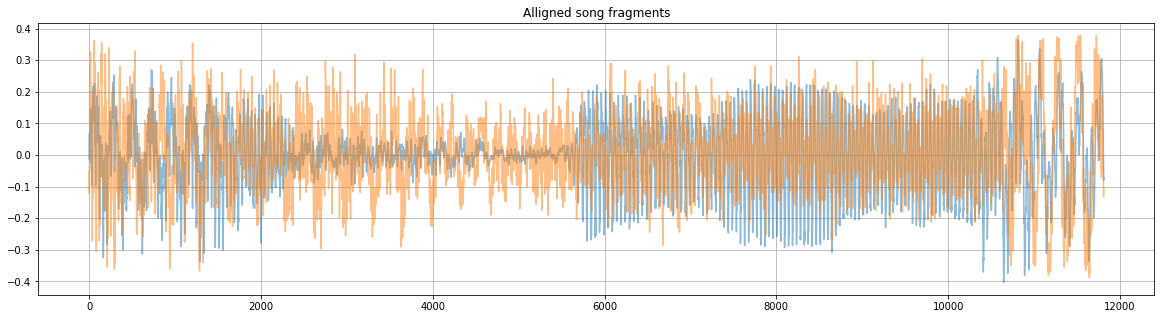

In [38]:
plt.figure(figsize=(20,5))
plt.plot(a2, alpha=0.5)
plt.plot(a3, alpha=0.5)
plt.title('Alligned song fragments')
plt.grid(which='both', axis='both')
plt.show()

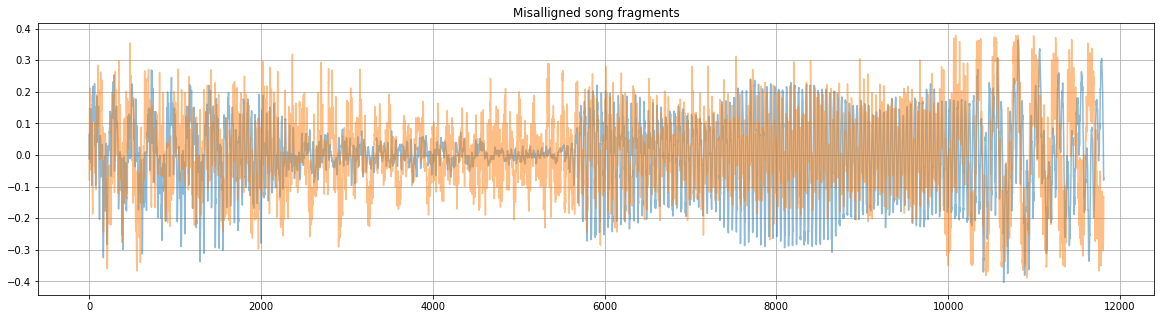

In [39]:
plt.figure(figsize=(20,5))
plt.plot(a2, alpha=0.5)
plt.plot(t2[int(len(t2)//2):int(len(t2)//2 + ((60/bpm) * fs2))], alpha=0.5)
plt.title('Misalligned song fragments')
plt.grid(which='both', axis='both')
plt.show()

In [32]:
bpms = get_bpm(t1, fs1)

In [26]:
x = len(t2) // fs1 + 10
get_bpm(t1[x*fs1:x*fs1+int((fs1*5.0001))], fs1)

112.8839590443686